Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

## Happiness report : Family and Economy


The Cantril ladder method has been used in the World Happiness Report. Respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.

While the report is entirely based on the survey score, the report is correlating the Happiness score with 6 key factors.

The first factor is GDP and GDP is basically the total of the all the goods and services produced in an economy in a given year. This is often used to indicate how wealthy the country is. And we are going to study in the report how they are correlated. 

The second factor is Family or Sorial support. In a survey, the sample population was asked whether they could count on their friends and relatives for help during times of crisis. Respondents were only allowed to answer saying either yes or no and a yes would equal 1 and a no would amount to 0. The average of all the answers would then be taken as a single value representing the total amount of social support in the country. In this report, we are going to find out if Family/Social support is affecting happiness score. 


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')

df2015 = pd.read_csv('datasets_kag_2015.csv')
df2016 = pd.read_csv('datasets_kag_2016.csv')
df2017 = pd.read_csv('datasets_kag_2017.csv')
df2018 = pd.read_csv('datasets_kag_2018.csv')
df2019 = pd.read_csv('datasets_kag_2019.csv')

In [2]:
# ********  1. The steps to clean the datasets  ********

# Each year includes different number of countries but the analysis is going to be per Region and not per Contury. 
# So, I'm not going to impute/drop the records.

# display(len(df2015)) # number of records => 158
# display(len(df2016)) # number of records => 157
# display(len(df2017)) # number of records => 155
# display(len(df2018)) # number of records => 156
# display(len(df2019)) # number of records => 156


# check if there's any missing value --> found 1 Government missing in 2018 dataset
# As I'm only ananylizing Family and Economy, I'll leave this as it is

# df2015.isnull().any()
# df2016.isnull().any()
# df2017.isnull().any()
# df2018.isnull().any() 
# df2019.isnull().any() 


# check if each dataset contains the required fields and field names are ready for use

# df2015.columns
# df2016.columns
# df2017.columns
# df2018.columns
# df2019.columns

# Found some field names contain special characters and space 
# --> Will rename the columns

# --rename 2015 dataset columns
df2015.rename(columns = {'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'Health',
                        'Trust (Government Corruption)':'Government', 'Happiness Rank':'HappinessRank',
                         'Happiness Score':'HappinessScore','Dystopia Residual':'DystopiaResidual',
                        'Standard Error':'StandardError'}, inplace = True)

#-- rename 2016 dataset columns
df2016.rename(columns = {'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'Health',
                        'Trust (Government Corruption)':'Government', 'Happiness Rank':'HappinessRank',
                         'Happiness Score':'HappinessScore','Dystopia Residual':'DystopiaResidual',
                        'Lower Confidence Interval':'LowerConfidence', 'Upper Confidence Interval':'UpperConfidence'}, 
                          inplace = True)

# rename 2017 dataset columns
df2017.rename(columns = {'Economy..GDP.per.Capita.':'Economy', 'Health..Life.Expectancy.':'Health',
                        'Trust..Government.Corruption.':'Government', 'Happiness.Rank':'HappinessRank',
                         'Happiness.Score':'HappinessScore','Dystopia.Residual':'DystopiaResidual',
                        'Whisker.high':'WhiskerHigh', 'Whisker.low':'WhiskerLow'}, 
                          inplace = True)


#-- rename 2018 dataset columns
df2018.rename(columns = {'Overall rank':'HappinessRank','Score':'HappinessScore','GDP per capita':'Economy', 
                          'Healthy life expectancy':'Health',
                        'Perceptions of corruption':'Government', 'Social support':'Family',
                         'Happiness.Score':'HappinessScore','Dystopia.Residual':'DystopiaResidual',
                        'Freedom to make life choices':'Freedom', 'Country or region':'Country'}, 
                          inplace = True)

#-- rename 2019 dataset columns
df2019.rename(columns = {'Overall rank':'HappinessRank','Score':'HappinessScore','GDP per capita':'Economy', 
                          'Healthy life expectancy':'Health',
                        'Perceptions of corruption':'Government', 'Social support':'Family', 
                         'Dystopia.Residual':'DystopiaResidual',
                        'Freedom to make life choices':'Freedom', 'Country or region':'Country'}, 
                          inplace = True)
print('* 2015 dataset columns')
print(df2015.columns)
print('* 2016 dataset columns')
print(df2016.columns)
print('* 2017 dataset columns')
print(df2017.columns)
print('* 2018 dataset columns')
print(df2018.columns)
print('* 2019 dataset columns')
print(df2019.columns)


* 2015 dataset columns
Index(['Country', 'Region', 'HappinessRank', 'HappinessScore', 'StandardError',
       'Economy', 'Family', 'Health', 'Freedom', 'Government', 'Generosity',
       'DystopiaResidual'],
      dtype='object')
* 2016 dataset columns
Index(['Country', 'Region', 'HappinessRank', 'HappinessScore',
       'LowerConfidence', 'UpperConfidence', 'Economy', 'Family', 'Health',
       'Freedom', 'Government', 'Generosity', 'DystopiaResidual'],
      dtype='object')
* 2017 dataset columns
Index(['Country', 'HappinessRank', 'HappinessScore', 'WhiskerHigh',
       'WhiskerLow', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Government', 'DystopiaResidual'],
      dtype='object')
* 2018 dataset columns
Index(['HappinessRank', 'Country', 'HappinessScore', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Government'],
      dtype='object')
* 2019 dataset columns
Index(['HappinessRank', 'Country', 'HappinessScore', 'Economy', 'Family',
       'Health

In [3]:
# ********  2. The steps to clean the datasets  ********

# Found 2017, 2018 and 2019 datasets are missing 'Region' field 
# --> Will add the field 'Region' with the values found in 2015 dataset

# Create the dictionary to use for filling in 'Region' to 2017 ~ 2019 datasets
country_dict = df2015.set_index('Country').to_dict()['Region']

# 2015 dataset is missing some of the conturies. Manually add these missing countries to our dictionary  
country_dict.update({'Taiwan Province of China':'Eastern Asia'})
country_dict.update({'Belize':'North America'})
country_dict.update({'Hong Kong S.A.R., China':'Eastern Asia'})
country_dict.update({'Somalia':'Sub-Saharan Africa'})
country_dict.update({'Namibia':'Sub-Saharan Africa'})
country_dict.update({'South Sudan':'Sub-Saharan Africa'})
country_dict.update({'Trinidad & Tobago':'Latin America and Caribbean'})
country_dict.update({'Northern Cyprus':'Central and Eastern Europe'})
country_dict.update({'North Macedonia':'Central and Eastern Europe'})
country_dict.update({'Gambia':'Sub-Saharan Africa'})

# use the Dictionary to fill in Region
df2017['Region'] = df2017['Country'].map(country_dict)
df2018['Region'] = df2018['Country'].map(country_dict)
df2019['Region'] = df2019['Country'].map(country_dict)

# confirm Region is all filled
# display(df2017[df2017['Region'].isnull()][['Country']])
# display(df2018[df2018['Region'].isnull()][['Country']])
# display(df2019[df2019['Region'].isnull()][['Country']])

# print a info as a sample if updated dataset looks okay
# df2015.info()
# df2016.info()
# df2017.info()
# df2018.info()
print('2019 dataset Info - sample')
df2019.info()


2019 dataset Info - sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HappinessRank   156 non-null    int64  
 1   Country         156 non-null    object 
 2   HappinessScore  156 non-null    float64
 3   Economy         156 non-null    float64
 4   Family          156 non-null    float64
 5   Health          156 non-null    float64
 6   Freedom         156 non-null    float64
 7   Generosity      156 non-null    float64
 8   Government      156 non-null    float64
 9   Region          156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [4]:
# ********  The steps to create the merged dataset  ********

# before merging the datasets, add a column to indicate the year
df2015['Yr'] = '2015'
df2016['Yr'] = '2016'
df2017['Yr'] = '2017'
df2018['Yr'] = '2018'
df2019['Yr'] = '2019'

df2015['Economy_percent'] = (df2015['Economy']/df2015['HappinessScore']) * 100
df2016['Economy_percent'] = (df2016['Economy']/df2015['HappinessScore']) * 100
df2017['Economy_percent'] = (df2017['Economy']/df2015['HappinessScore']) * 100
df2018['Economy_percent'] = (df2018['Economy']/df2015['HappinessScore']) * 100
df2019['Economy_percent'] = (df2019['Economy']/df2015['HappinessScore']) * 100

df2015['Family_percent'] = (df2015['Family']/df2015['HappinessScore']) * 100
df2016['Family_percent'] = (df2016['Family']/df2015['HappinessScore']) * 100
df2017['Family_percent'] = (df2017['Family']/df2015['HappinessScore']) * 100
df2018['Family_percent'] = (df2018['Family']/df2015['HappinessScore']) * 100
df2019['Family_percent'] = (df2019['Family']/df2015['HappinessScore']) * 100

df_all = pd.concat([df2015, df2016, df2017, df2018, df2019])
df_all.reset_index(inplace = True)  # should confirm

# only copy columns to used in the reporting dataset
df_rpt = df_all[['HappinessRank', 'HappinessScore', 'Yr','Country', 'Region',
                 'Economy','Family', 'Health','Freedom','Generosity','Government', 'Economy_percent','Family_percent']].copy()

# df_rpt['Economy_percent']= (df_rpt['Economy']/df_rpt['HappinessScore']) * 100
# df_rpt['Family_percent']= (df_rpt['Family']/df_rpt['HappinessScore']) * 100

# since Government is not included in this Family & Health analysis, 
# I used temporary value, mean of 'United Arab Emirates' government to avoid NaN complain
df_rpt.loc[df_rpt['Government'].isnull(), ['Government']] = np.float64(0.34000)

print ('< Final dataset to be used for the analysis >')
df_rpt.head(3)

< Final dataset to be used for the analysis >


,HappinessRank,HappinessScore,Yr,Country,Region,Economy,Family,Health,Freedom,Generosity,Government,Economy_percent,Family_percent
0,1,7.587,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,18.406617,17.787136
1,2,7.561,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,17.224177,18.545563
2,3,7.527,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,17.609672,18.075993


In [5]:
df_rpt[df_rpt['Region'].isnull()]

,HappinessRank,HappinessScore,Yr,Country,Region,Economy,Family,Health,Freedom,Generosity,Government,Economy_percent,Family_percent


In [6]:
# ******** Correlation of Family and Happiness / GDP and Happiness ********

# check correlation of all columns

print('< Correlation of all columns >')
corr_all = df_rpt.corr()
display(corr_all)

print('---> While Economy is the most correlated factor, Family also shows strong correlationship') 

< Correlation of all columns >


,HappinessRank,HappinessScore,Economy,Family,Health,Freedom,Generosity,Government,Economy_percent,Family_percent
HappinessRank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.117713,-0.374767,-0.481510,-0.007644
HappinessScore,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.400189,0.475231,0.017675
Economy,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.311362,0.900242,0.110380
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.123624,0.433933,0.753275
Health,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250447,0.645420,0.121015
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.456031,0.122331,0.081027
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.317379,-0.142224,-0.161698
Government,-0.374767,0.400189,0.311362,0.123624,0.250447,0.456031,0.317379,1.000000,0.121541,-0.160468
Economy_percent,-0.481510,0.475231,0.900242,0.433933,0.645420,0.122331,-0.142224,0.121541,1.000000,0.186279
Family_percent,-0.007644,0.017675,0.110380,0.753275,0.121015,0.081027,-0.161698,-0.160468,0.186279,1.000000


---> While Economy is the most correlated factor, Family also shows strong correlationship


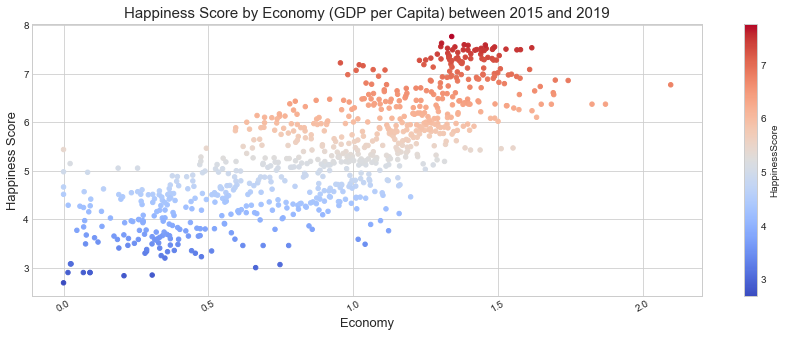

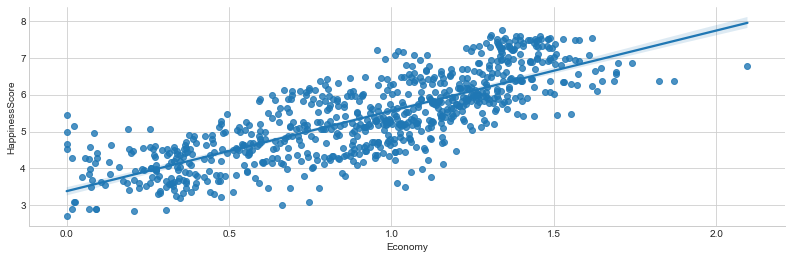

In [7]:
# display Happiness Score by Economy 2015-2019 with 2 different styles
# scatter graph 
ax = df_rpt.plot(kind="scatter", x="Economy", y="HappinessScore", figsize=(15,5), c="HappinessScore", cmap="coolwarm", colorbar=True,
    sharex=False , rot=30)
ax.set_title('Happiness Score by Economy (GDP per Capita) between 2015 and 2019', fontsize=15)
ax.set_xlabel('Economy', fontsize = 13) 
ax.set_ylabel('Happiness Score', fontsize = 13)

# lmplot graph
sns.lmplot(data = df_rpt, x="Economy", y="HappinessScore", palette="Set1", height=3.7, aspect=3)


The graph, Happiness score by Economy, shows they have linear relationship meaning people in wealthy countries tend to feel happier than people in poor countries.   

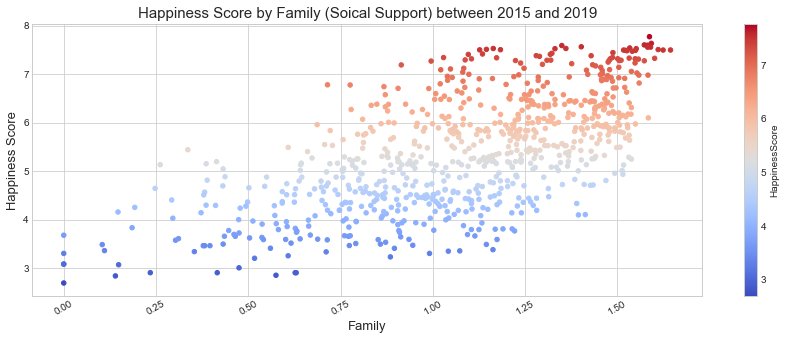

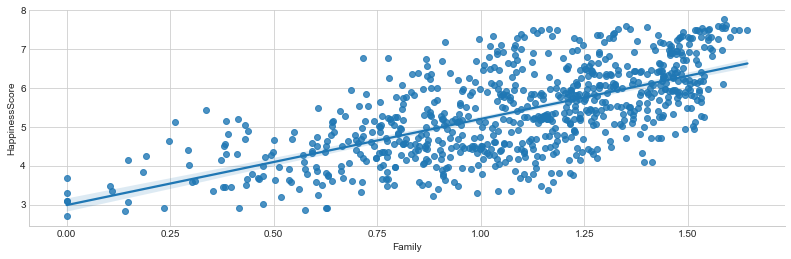

In [8]:
# display Happiness Score by Family 2015-2019 with 2 different styles
# scatter graph 
ax = df_rpt.plot(kind="scatter", x="Family", y="HappinessScore", figsize=(15,5), c="HappinessScore", cmap="coolwarm", colorbar=True,
    sharex=False , rot=30)
ax.set_title('Happiness Score by Family (Soical Support) between 2015 and 2019', fontsize=15)
ax.set_xlabel('Family', fontsize = 13) 
ax.set_ylabel('Happiness Score', fontsize = 13)

# lmplot graph
sns.lmplot(data = df_rpt, x="Family", y="HappinessScore", palette="Set1", height=3.7, aspect=3)


The graph, Happiness score by family/social support, shows close to the linear line meaning people having good social support tend to feel happier than the people without.

,HappinessScore,Economy,Economy_percent
Yr,,,
2015,5.375734,0.846137,15.144591
2016,5.382185,0.953880,17.139982
2017,5.354019,0.984718,17.564914
2018,5.375917,0.891449,15.929249
2019,5.407096,0.905147,16.191178


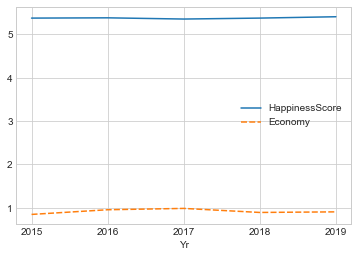

In [9]:
df_by_yr = df_rpt.groupby('Yr')[['HappinessScore', 'Economy', 'Family', 'Economy_percent', 'Family_percent' ]].mean()
display(df_by_yr[['HappinessScore', 'Economy', 'Economy_percent']])
sns.lineplot(data=df_by_yr[['HappinessScore', 'Economy']], palette="tab10")


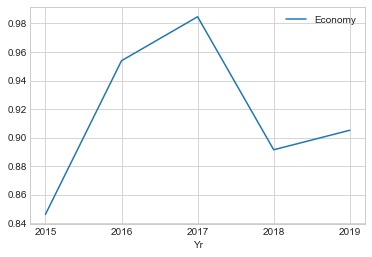

In [10]:
sns.lineplot(data=df_by_yr[['Economy']], palette="tab10")

,HappinessScore,Family,Family_percent
Yr,,,
2015,5.375734,0.991046,18.427493
2016,5.382185,0.793621,14.553698
2017,5.354019,1.188898,21.982979
2018,5.375917,1.213237,22.495226
2019,5.407096,1.208814,22.380425


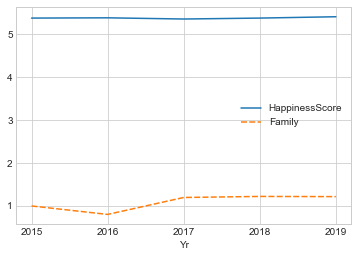

In [11]:
display(df_by_yr[['HappinessScore', 'Family', 'Family_percent']])
sns.lineplot(data=df_by_yr[['HappinessScore', 'Family']], palette="tab10")

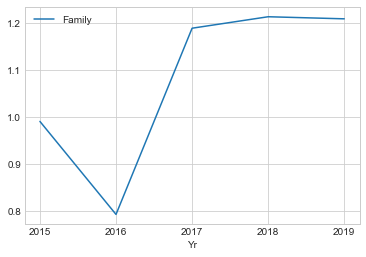

In [12]:
sns.lineplot(data=df_by_yr[['Family']], palette="tab10")

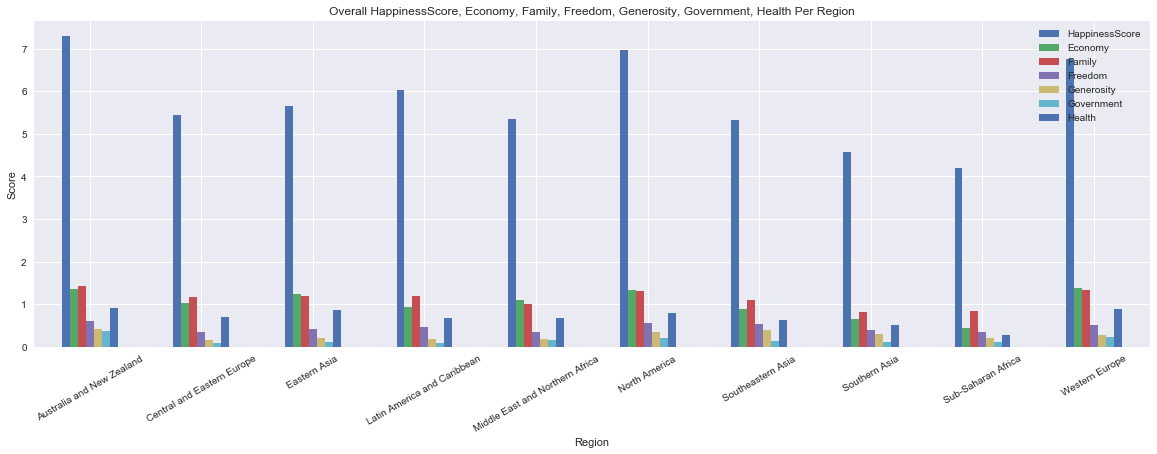

In [13]:
# Happiness/Economy/Family per Region
plt.style.use('seaborn')

df_by_region = df_rpt.groupby('Region')[['HappinessScore', 'Economy','Family', 'Freedom', 'Generosity','Government','Health']].mean().reset_index()

ax = df_by_region.plot(kind='bar', x='Region', y=['HappinessScore', 'Economy','Family', 'Freedom', 'Generosity','Government','Health'], rot=30, figsize=(20, 6), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Region')
ax.set_title('Overall HappinessScore, Economy, Family, Freedom, Generosity, Government, Health Per Region')

plt.show()


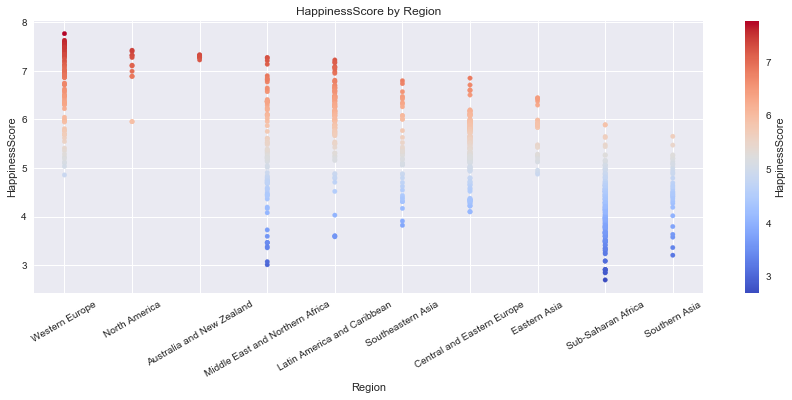

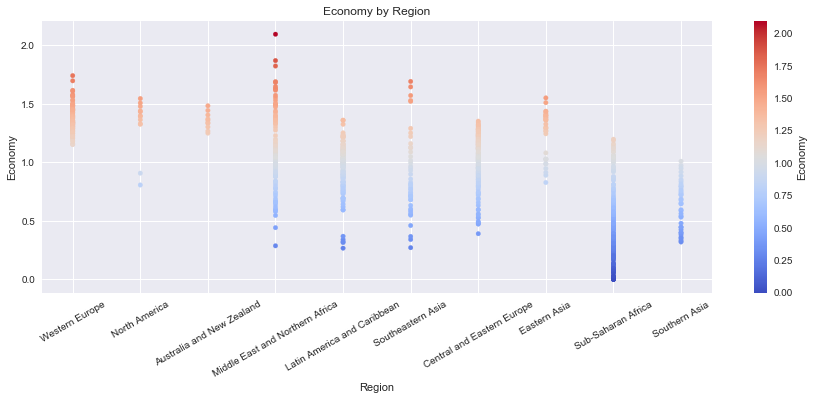

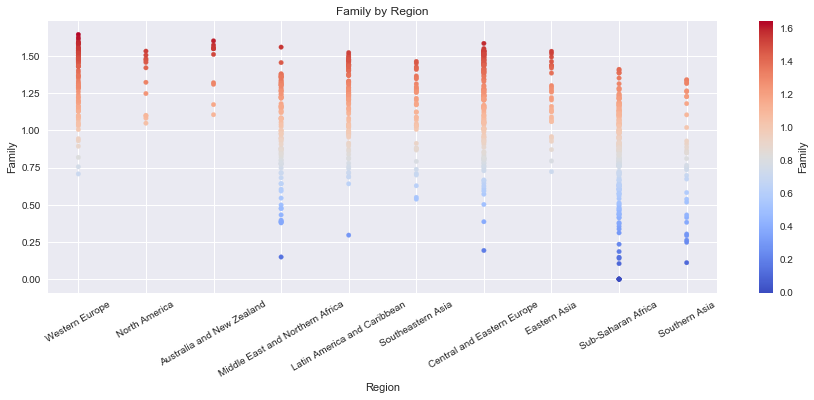

In [14]:
# Each Happiness/ Economy /Family per Region

ax1 = df_rpt.plot(kind="scatter", x="Region", y="HappinessScore", figsize=(15,5), c="HappinessScore", cmap="coolwarm", colorbar=True,
    sharex=False , rot=30)
ax1.set_title('HappinessScore by Region')

ax2 = df_rpt.plot(kind="scatter", x="Region", y="Economy", figsize=(15,5), c="Economy", cmap="coolwarm", colorbar=True,
    sharex=False , rot=30)
ax2.set_title('Economy by Region')

ax3 = df_rpt.plot(kind="scatter", x="Region", y="Family", figsize=(15,5), c="Family", cmap="coolwarm", colorbar=True,
    sharex=False , rot=30)
ax3.set_title('Family by Region')

plt.show()

Text(0.5, 1.0, 'Economy between 2015-2019 by Region')

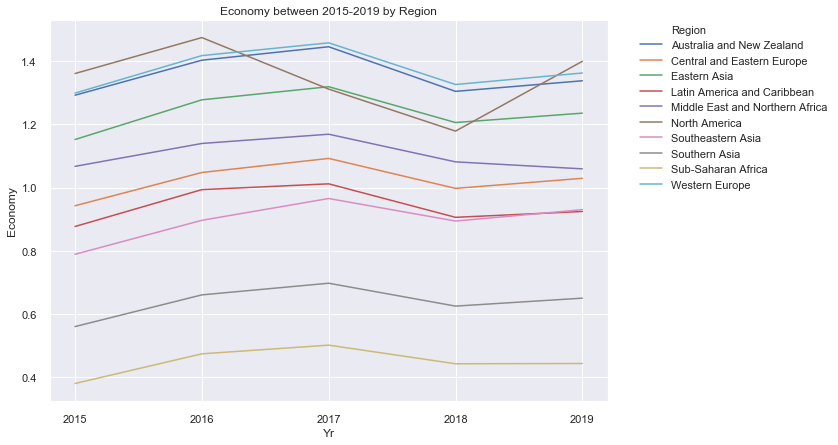

In [15]:
sns.set(rc={'figure.figsize':(10,7)})
df_by_region_yr = df_rpt.groupby(['Region','Yr'])[['HappinessScore', 'Economy','Family', 'Freedom', 'Generosity','Government','Health']].mean().reset_index()

sns.lineplot(data=df_by_region_yr, x='Yr', y='Economy', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Economy between 2015-2019 by Region')

Text(0.5, 1.0, 'Economy between 2015-2019 by Region')

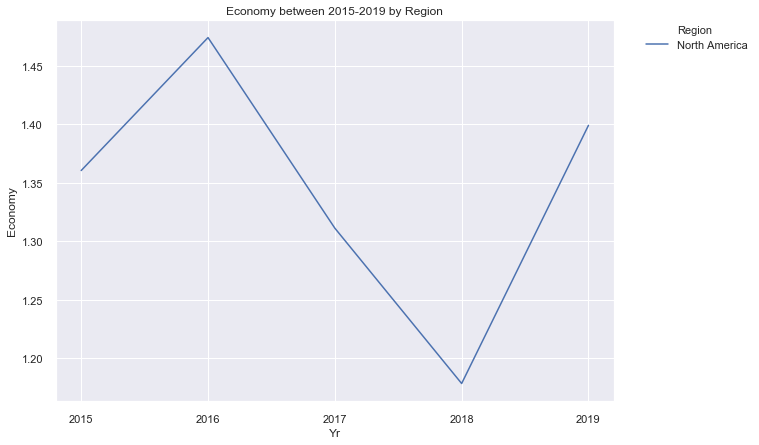

In [16]:
sns.set(rc={'figure.figsize':(10,7)})
df_by_region_yr = df_rpt.groupby(['Region','Yr'])[['HappinessScore', 'Economy','Family', 'Freedom', 'Generosity','Government','Health']].mean().reset_index()

sns.lineplot(data=df_by_region_yr[df_by_region_yr['Region']=='North America'], x='Yr', y='Economy', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Economy between 2015-2019 by Region')

Text(0.5, 1.0, 'Family between 2015-2019 by Region')

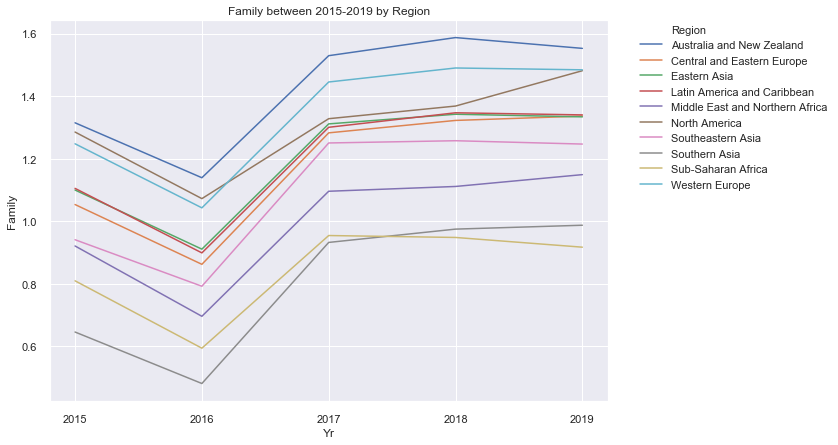

In [17]:
sns.lineplot(data=df_by_region_yr, x='Yr', y='Family', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Family between 2015-2019 by Region')

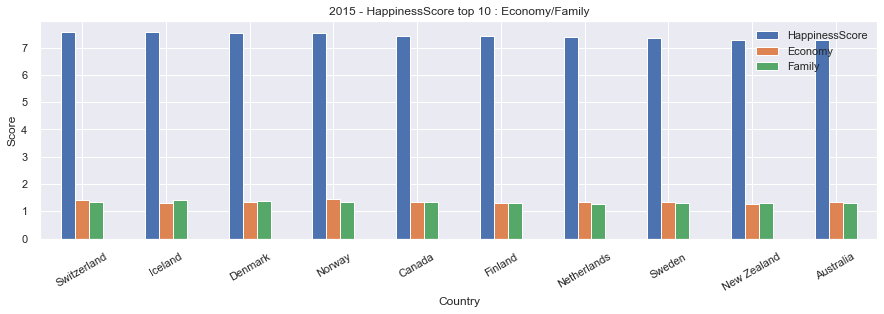

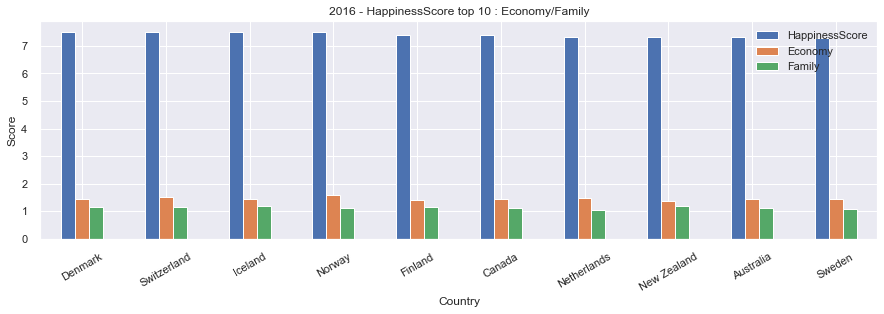

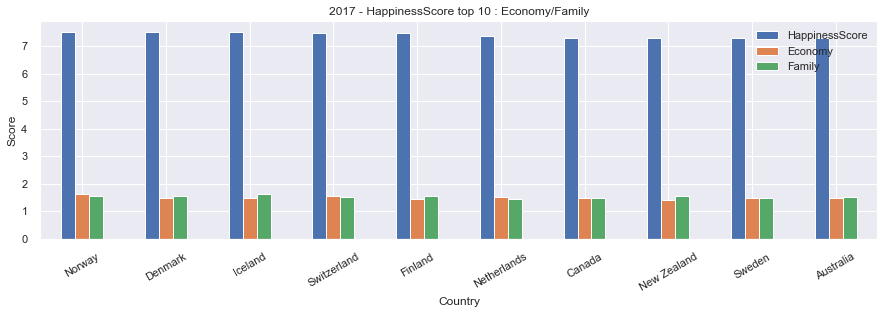

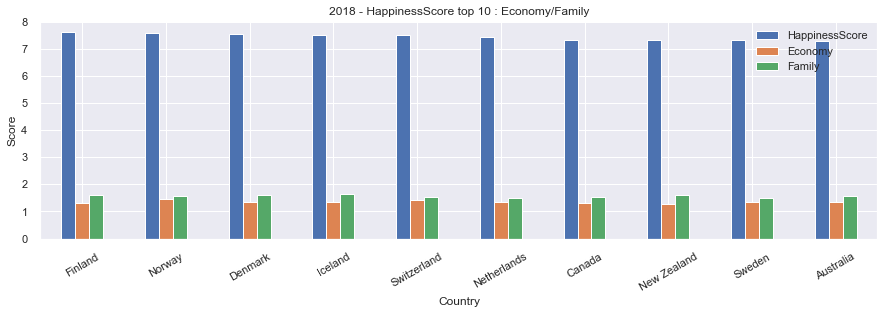

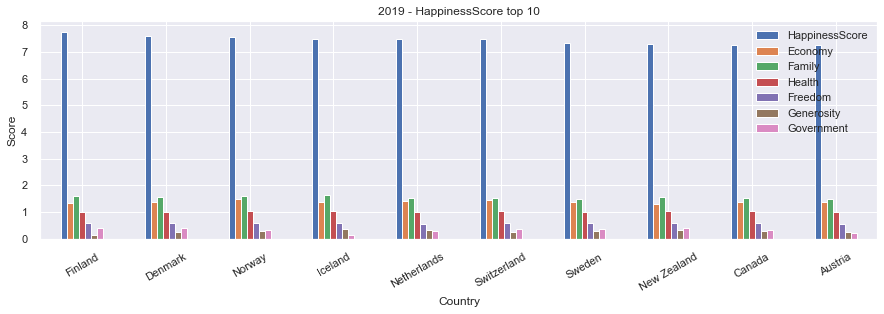

In [18]:
# first 10 countries each year
df_rank10 = df_rpt[df_rpt['HappinessRank']<=10 ][['Yr','HappinessRank', 'Region', 'Country', 'HappinessScore', 
                                                  'Economy','Family', 'Health','Freedom','Generosity',
                                                  'Government','Economy_percent', 'Family_percent']]

df_rank10_2015 = df_rank10[df_rank10['Yr']=='2015']
df_rank10_2016 = df_rank10[df_rank10['Yr']=='2016']
df_rank10_2017 = df_rank10[df_rank10['Yr']=='2017']
df_rank10_2018 = df_rank10[df_rank10['Yr']=='2018']
df_rank10_2019 = df_rank10[df_rank10['Yr']=='2019']

ax = df_rank10_2015.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2015 - HappinessScore top 10 : Economy/Family')

ax = df_rank10_2016.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2016 - HappinessScore top 10 : Economy/Family')

ax = df_rank10_2017.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2017 - HappinessScore top 10 : Economy/Family')

ax = df_rank10_2018.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2018 - HappinessScore top 10 : Economy/Family')

ax = df_rank10_2019.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family','Health','Freedom','Generosity','Government'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2019 - HappinessScore top 10')

plt.show()

In [19]:
# display(df_rank10_2015[['Yr', 'HappinessRank','Country','HappinessScore']])
# display(df_rank10_2016[['Yr', 'HappinessRank','Country','HappinessScore']])
# display(df_rank10_2017[['Yr', 'HappinessRank','Country','HappinessScore']])
# display(df_rank10_2018[['Yr', 'HappinessRank','Country','HappinessScore']])
# display(df_rank10_2019[['Yr', 'HappinessRank','Country','HappinessScore']])
display(df_rank10_2019[['Yr', 'HappinessRank','Region','Country','HappinessScore','Economy','Economy_percent']])

,Yr,HappinessRank,Region,Country,HappinessScore,Economy,Economy_percent
626,2019,1,Western Europe,Finland,7.769,1.340,17.661790
627,2019,2,Western Europe,Denmark,7.600,1.383,18.291231
628,2019,3,Western Europe,Norway,7.554,1.488,19.768832
629,2019,4,Western Europe,Iceland,7.494,1.380,18.346185
630,2019,5,Western Europe,Netherlands,7.488,1.396,18.796284
631,2019,6,Western Europe,Switzerland,7.480,1.452,19.605725
632,2019,7,Western Europe,Sweden,7.343,1.387,18.799133
633,2019,8,Australia and New Zealand,New Zealand,7.307,1.303,17.694188
634,2019,9,North America,Canada,7.278,1.365,18.734559
635,2019,10,Western Europe,Austria,7.246,1.376,18.890719


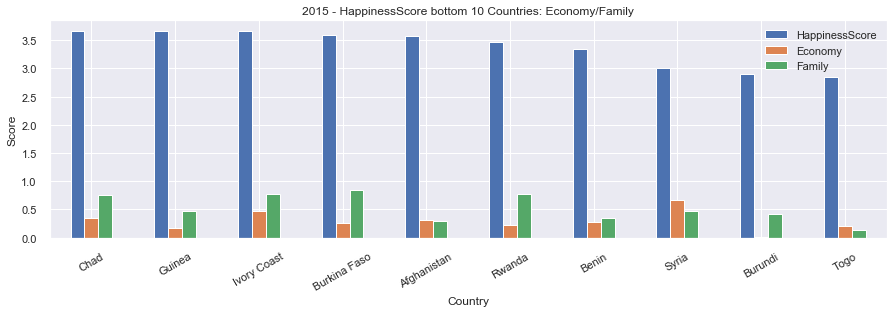

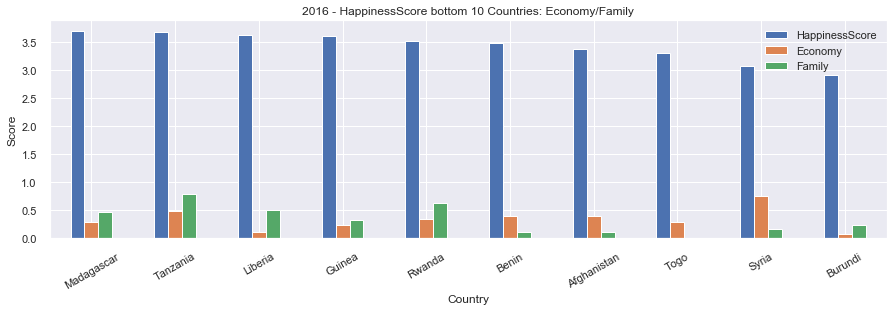

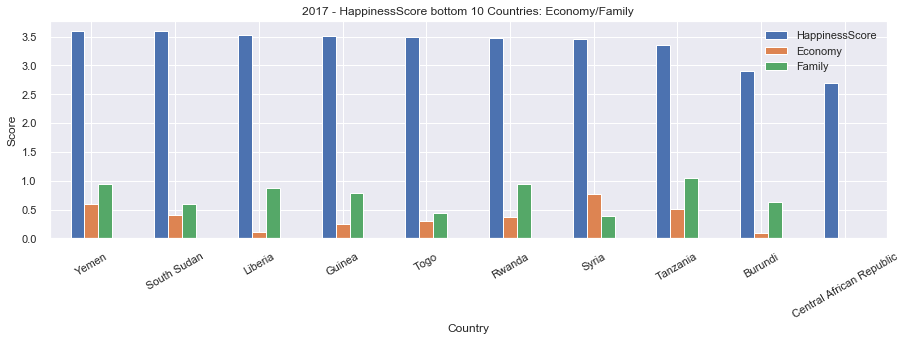

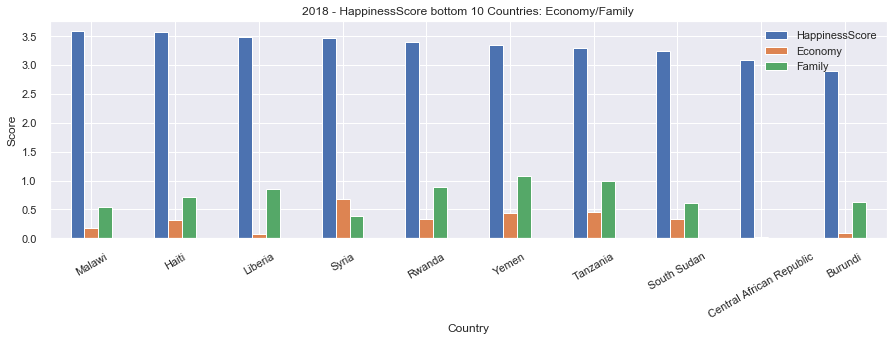

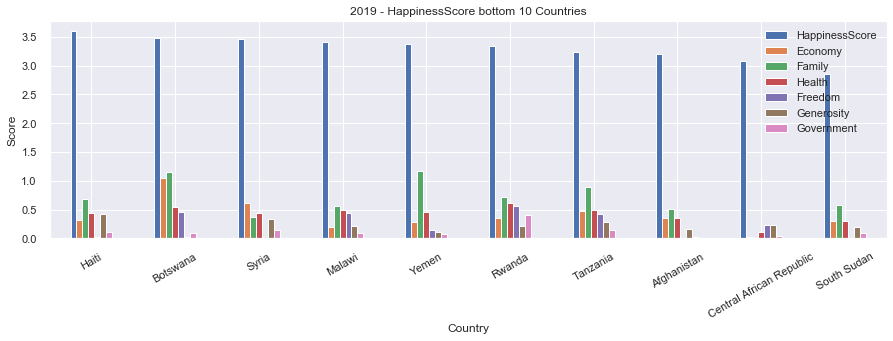

In [20]:
# bottom 10 countries each year
df_bottom10 = df2015.tail(10)[['Yr',
                               'HappinessRank', 'Region','Country', 'HappinessScore', 'Economy','Family',
                               'Health','Freedom','Generosity','Government',
                               'Economy_percent', 'Family_percent']]
df_bottom10 = df_bottom10.append(df2016.tail(10)[['Yr','HappinessRank','Region','Country', 'HappinessScore', 'Economy','Family',
                                                  'Health','Freedom','Generosity','Government','Economy_percent', 'Family_percent']])
df_bottom10 = df_bottom10.append(df2017.tail(10)[['Yr','HappinessRank','Region', 'Country', 'HappinessScore', 'Economy','Family',
                                                  'Health','Freedom','Generosity','Government','Economy_percent', 'Family_percent']])
df_bottom10 = df_bottom10.append(df2018.tail(10)[['Yr','HappinessRank','Region','Country', 'HappinessScore', 'Economy','Family',
                                                  'Health','Freedom','Generosity','Government','Economy_percent', 'Family_percent']])
df_bottom10 = df_bottom10.append(df2019.tail(10)[['Yr','HappinessRank','Region','Country', 'HappinessScore', 'Economy','Family',
                                                  'Health','Freedom','Generosity','Government','Economy_percent', 'Family_percent']])

df_bottom10_2015 = df_bottom10[df_bottom10['Yr']=='2015']
df_bottom10_2016 = df_bottom10[df_bottom10['Yr']=='2016']
df_bottom10_2017 = df_bottom10[df_bottom10['Yr']=='2017']
df_bottom10_2018 = df_bottom10[df_bottom10['Yr']=='2018']
df_bottom10_2019 = df_bottom10[df_bottom10['Yr']=='2019']

ax = df_bottom10_2015.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2015 - HappinessScore bottom 10 Countries: Economy/Family')

ax = df_bottom10_2016.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2016 - HappinessScore bottom 10 Countries: Economy/Family')

ax = df_bottom10_2017.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2017 - HappinessScore bottom 10 Countries: Economy/Family')

ax = df_bottom10_2018.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2018 - HappinessScore bottom 10 Countries: Economy/Family')

ax = df_bottom10_2019.plot(kind='bar', x='Country', y=['HappinessScore', 'Economy','Family','Health','Freedom','Generosity','Government'], rot=30, figsize=(15, 4), legend=True);
ax.set_ylabel('Score');
ax.set_xlabel('Country')
ax.set_title('2019 - HappinessScore bottom 10 Countries')

plt.show()


In [21]:
# display(df_bottom10_2015)
# display(df_bottom10_2016)
# display(df_bottom10_2017)
# display(df_bottom10_2018)
# display(df_bottom10_2019[['Yr','HappinessRank','Region','Country','HappinessScore','Family','Family_percent']])
display(df_bottom10_2019[['Yr','HappinessRank','Region','Country','HappinessScore','Economy','Economy_percent']])

,Yr,HappinessRank,Region,Country,HappinessScore,Economy,Economy_percent
146,2019,147,Latin America and Caribbean,Haiti,3.597,0.323,8.774789
147,2019,148,Sub-Saharan Africa,Botswana,3.488,1.041,28.303426
148,2019,149,Middle East and Northern Africa,Syria,3.462,0.619,16.880284
149,2019,150,Sub-Saharan Africa,Malawi,3.410,0.191,5.224289
150,2019,151,Middle East and Northern Africa,Yemen,3.380,0.287,7.852257
151,2019,152,Sub-Saharan Africa,Rwanda,3.334,0.359,10.008364
152,2019,153,Sub-Saharan Africa,Tanzania,3.231,0.476,13.314685
153,2019,154,Southern Asia,Afghanistan,3.203,0.350,10.101010
154,2019,155,Sub-Saharan Africa,Central African Republic,3.083,0.026,0.778443
155,2019,156,Sub-Saharan Africa,South Sudan,2.853,0.306,10.179641


The graphs indicate that the people in a strong economy country are more likely to feel happier. This can be interpreted as a strong economy enables a country to support and serve people better. In these wealthy countries, people can afford more things which leads to happiness. This can explain why bottom countries also have a weak economy. 

The family/social support also shows strong correlation with the Happiness rank. This can be interpreted as when people have other people to rely on they feel secure and this affects their happiness score.

https://en.wikipedia.org/wiki/Happiness 

https://worldhappiness.report/faq/

https://www.indianfolk.com/happiness-index-measuring-joy-across-globe/

https://www.trackinghappiness.com/happiness-index-2018/